# Model Selection
---

In [37]:
import joblib as jl
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from matplotlib.colors import Normalize

In [17]:
# Compute accuracy, precision, recall and AUPRC for each model
def compute_metrics(model, data):
    y_pred = model.predict(data[:, :-1])
    y_true = data[:, -1]
    accuracy = sk.metrics.accuracy_score(y_true, y_pred)
    #precision = sk.metrics.precision_score(y_true, y_pred)
    #recall = sk.metrics.recall_score(y_true, y_pred)
    #auprc = sk.metrics.average_precision_score(y_true, y_pred, average='micro')
    return accuracy

### Models With Only Symptoms One Hot

In [20]:
# Load the models
path = '../prediction_model/models/'
mod_names = ['log_reg_classic', 'log_reg_classic', 'MLP_classic']

log_reg = jl.load(path + mod_names[0] + '.joblib')
random_forest = jl.load(path + mod_names[1] + '.joblib')
MLP = jl.load(path + mod_names[2] + '.joblib')

# Load the data
path = '../prediction_model/features/'
data_names = ['symptoms']

symptoms = np.load(path + data_names[0] + '.npz')
data = np.concatenate((symptoms['X'], symptoms['y'].reshape(symptoms['y'].shape[0],1)), axis=1)

In [26]:
# create a dataframe with model names and metrics and the corresponding values
metrics = ['accuracy']
df = pd.DataFrame(columns=metrics, index = mod_names)

df.loc['log_reg_classic', metrics] = compute_metrics(log_reg, data)
#df.loc['random_forest_classic', metrics] = compute_metrics(random_forest, data)
df.loc['MLP_classic', metrics] = compute_metrics(MLP, data)

df

,accuracy
log_reg_classic,0.8318
log_reg_classic,0.8318
MLP_classic,0.825113


/tmp/ipykernel_1959/1406076146.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


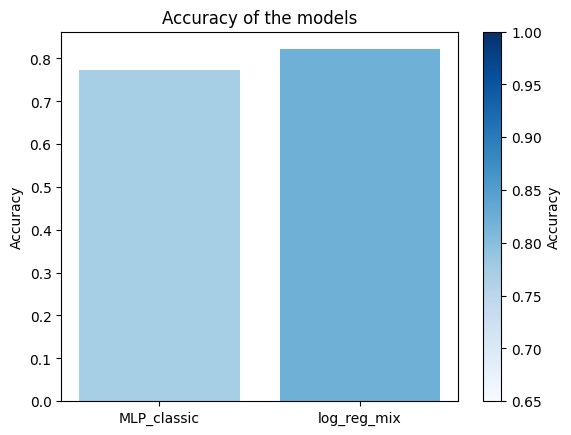

In [54]:
# plot the accuracies
accuracy_values = df['accuracy']

# Create a colormap
cmap = cm.get_cmap('Blues')

# Normalize the data to map it to the colormap
norm = Normalize(vmin=0.65, vmax=1)

# Get the colors for each bar based on the normalized accuracy values
colors = [cmap(norm(value)) for value in accuracy_values]

# Plot the bar chart with colored bars
fig, ax = plt.subplots()
bars = ax.bar(mod_names, accuracy_values, color=colors)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of the models')

# Add a colorbar to show the mapping of values to colors
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy')

plt.show()

### Models With New Features

In [28]:
# Load the models
path = '../prediction_model/models/'
mod_names = ['log_reg_mix', 'log_reg_mix', 'MLP_mix']


log_reg = jl.load(path + mod_names[0] + '.joblib')
random_forest = jl.load(path + mod_names[1] + '.joblib')
MLP = jl.load(path + mod_names[2] + '.joblib')

# Load the data
path = '../prediction_model/features/'
data_names = ['betweenness', 'community_count', 'community_size']

betweenness = np.load(path + data_names[0] + '.npz')
community_count = np.load(path + data_names[1] + '.npz')
community_size = np.load(path + data_names[2] + '.npz')

# Associate the features 
data_log_reg = np.concatenate((betweenness['X'], community_count['X'], community_size['X'], community_count['y'].reshape(symptoms['y'].shape[0],1)), axis=1)
data_random_forest = np.concatenate((betweenness['X'], community_count['X'], community_size['X'], community_count['y'].reshape(symptoms['y'].shape[0],1)), axis=1)
data_MLP = np.concatenate((community_count['X'], community_size['X'], community_count['y'].reshape(symptoms['y'].shape[0],1)), axis=1)


In [30]:
# create a dataframe with model names and metrics and the corresponding values
metrics = ['accuracy']
df = pd.DataFrame(columns=metrics, index = mod_names)

df.loc['log_reg_mix', metrics] = compute_metrics(log_reg, data_log_reg)
#df.loc['random_forest_mix', metrics] = compute_metrics(random_forest, data_random_forest)
df.loc['MLP_mix', metrics] = compute_metrics(MLP, data_MLP)

df

,accuracy
log_reg_mix,0.82174
log_reg_mix,0.82174
MLP_mix,0.772747


/tmp/ipykernel_1959/3723584459.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


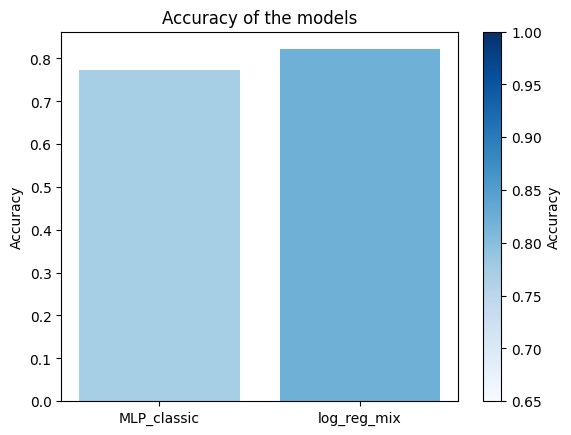

In [55]:
# plot the accuracies
accuracy_values = df['accuracy']

# Create a colormap
cmap = cm.get_cmap('Blues')

# Normalize the data to map it to the colormap
norm = Normalize(vmin=0.65, vmax=1)

# Get the colors for each bar based on the normalized accuracy values
colors = [cmap(norm(value)) for value in accuracy_values]

# Plot the bar chart with colored bars
fig, ax = plt.subplots()
bars = ax.bar(mod_names, accuracy_values, color=colors)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of the models')

# Add a colorbar to show the mapping of values to colors
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy')

plt.show()


### Compare the two best models

In [34]:
# Load the models
path = '../prediction_model/models/'
mod_names = ['MLP_classic', 'log_reg_mix']

classic = jl.load(path + mod_names[0] + '.joblib')
mix = jl.load(path + mod_names[1] + '.joblib')

# Load the data
path = '../prediction_model/features/'
data_names = ['symptoms', 'betweenness', 'community_count', 'community_size']

symptoms = np.load(path + data_names[0] + '.npz')
betweenness = np.load(path + data_names[1] + '.npz')
community_count = np.load(path + data_names[2] + '.npz')
community_size = np.load(path + data_names[3] + '.npz')

data_classic = np.concatenate((symptoms['X'], symptoms['y'].reshape(symptoms['y'].shape[0],1)), axis=1)
data_mix = np.concatenate((betweenness['X'], community_count['X'], community_size['X'], community_count['y'].reshape(symptoms['y'].shape[0],1)), axis=1)

In [35]:
# create a dataframe with model names and metrics and the corresponding values
metrics = ['accuracy']
df = pd.DataFrame(columns=metrics, index = mod_names)

df.loc['log_reg_mix', metrics] = compute_metrics(log_reg, data_log_reg)
#df.loc['random_forest', metrics] = compute_metrics(random_forest, data_random_forest)
df.loc['MLP_classic', metrics] = compute_metrics(MLP, data_MLP)

df

,accuracy
MLP_classic,0.772747
log_reg_mix,0.82174


/tmp/ipykernel_1959/3723584459.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


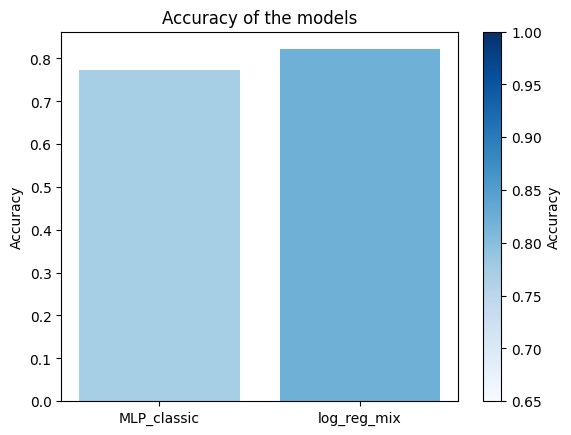

In [56]:
# plot the accuracies
accuracy_values = df['accuracy']

# Create a colormap
cmap = cm.get_cmap('Blues')

# Normalize the data to map it to the colormap
norm = Normalize(vmin=0.65, vmax=1)

# Get the colors for each bar based on the normalized accuracy values
colors = [cmap(norm(value)) for value in accuracy_values]

# Plot the bar chart with colored bars
fig, ax = plt.subplots()
bars = ax.bar(mod_names, accuracy_values, color=colors)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of the models')

# Add a colorbar to show the mapping of values to colors
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
cbar.set_label('Accuracy')

plt.show()
